In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e5/sample_submission.csv
/kaggle/input/playground-series-s3e5/train.csv
/kaggle/input/playground-series-s3e5/test.csv


In [2]:
#Importing Libraries 
import pandas as pd;pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [3]:
#Gathering Data
df_train=pd.read_csv("/kaggle/input/playground-series-s3e5/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s3e5/test.csv")

In [4]:
df_train.head(5)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [5]:
df_train.drop(columns='Id',axis=1,inplace=True)
df_test.drop(columns='Id',axis=1,inplace=True)

In [6]:
# Brief Introduction of Training Data
print("---------------Train Dataset Shape---------------")
display(df_train.shape)
print("---------------Describing Numerical Variables---------------")
display(df_train.describe(exclude="object").T)
print("---------------Feature Information---------------")
display(df_train.info())
## Brief Introduction of Testing Data
print("---------------Test Dataset Shape---------------")
display(df_test.shape)
print("---------------Describing Numerical Variables---------------")
display(df_test.describe(exclude="object").T)
print("---------------Feature Information---------------")
display(df_test.info())

---------------Train Dataset Shape---------------


(2056, 12)

---------------Describing Numerical Variables---------------


,count,mean,std,min,25%,50%,75%,max
fixed acidity,2056.0,8.365175,1.705390,5.00000,7.2000,7.9500,9.2000,15.90000
volatile acidity,2056.0,0.527601,0.173164,0.18000,0.3900,0.5200,0.6400,1.58000
citric acid,2056.0,0.265058,0.188267,0.00000,0.0900,0.2500,0.4200,0.76000
residual sugar,2056.0,2.398881,0.858824,1.20000,1.9000,2.2000,2.6000,14.00000
chlorides,2056.0,0.081856,0.023729,0.01200,0.0710,0.0790,0.0900,0.41400
free sulfur dioxide,2056.0,16.955982,10.009710,1.00000,8.0000,16.0000,24.0000,68.00000
total sulfur dioxide,2056.0,49.236868,32.961141,7.00000,22.0000,44.0000,65.0000,289.00000
density,2056.0,0.996748,0.001827,0.99007,0.9956,0.9967,0.9978,1.00369
pH,2056.0,3.310569,0.142321,2.74000,3.2000,3.3100,3.3900,3.78000
sulphates,2056.0,0.641308,0.137942,0.39000,0.5500,0.6100,0.7200,1.95000


---------------Feature Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2056 non-null   float64
 1   volatile acidity      2056 non-null   float64
 2   citric acid           2056 non-null   float64
 3   residual sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free sulfur dioxide   2056 non-null   float64
 6   total sulfur dioxide  2056 non-null   float64
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 192.9 KB


None

---------------Test Dataset Shape---------------


(1372, 11)

---------------Describing Numerical Variables---------------


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1372.0,8.369606,1.664694,4.90000,7.10000,7.9000,9.1000,15.6000
volatile acidity,1372.0,0.524311,0.176942,0.12000,0.39000,0.5000,0.6350,1.3300
citric acid,1372.0,0.270569,0.185731,0.00000,0.11000,0.2600,0.4200,0.7600
residual sugar,1372.0,2.415926,0.921155,1.30000,2.00000,2.2000,2.5000,8.3000
chlorides,1372.0,0.081307,0.026566,0.01200,0.07000,0.0780,0.0870,0.4670
free sulfur dioxide,1372.0,17.162536,9.974082,1.00000,8.00000,16.0000,24.0000,68.0000
total sulfur dioxide,1372.0,49.089286,32.803721,8.00000,23.00000,43.0000,66.0000,165.0000
density,1372.0,0.996670,0.001822,0.99007,0.99538,0.9966,0.9978,1.0032
pH,1372.0,3.312223,0.141405,2.74000,3.21000,3.3100,3.3900,4.0100
sulphates,1372.0,0.647267,0.134792,0.39000,0.55000,0.6200,0.7300,1.6200


---------------Feature Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1372 non-null   float64
 1   volatile acidity      1372 non-null   float64
 2   citric acid           1372 non-null   float64
 3   residual sugar        1372 non-null   float64
 4   chlorides             1372 non-null   float64
 5   free sulfur dioxide   1372 non-null   float64
 6   total sulfur dioxide  1372 non-null   float64
 7   density               1372 non-null   float64
 8   pH                    1372 non-null   float64
 9   sulphates             1372 non-null   float64
 10  alcohol               1372 non-null   float64
dtypes: float64(11)
memory usage: 118.0 KB


None

In [7]:
df_train.nunique()

fixed acidity            87
volatile acidity        113
citric acid              71
residual sugar           66
chlorides               103
free sulfur dioxide      49
total sulfur dioxide    126
density                 313
pH                       77
sulphates                73
alcohol                  53
quality                   6
dtype: int64

In [8]:
#Checking Outilers and later visualization
#Checking Outilers
Q1=df_train.quantile(0.25)
Q3=df_train.quantile(0.75)
IQR=Q3-Q1
IQR
((df_train<(Q1-1.5*IQR)) | (df_train>(Q3+1.5*IQR))).any()

fixed acidity            True
volatile acidity         True
citric acid             False
residual sugar           True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
quality                  True
dtype: bool

In [9]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
data=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

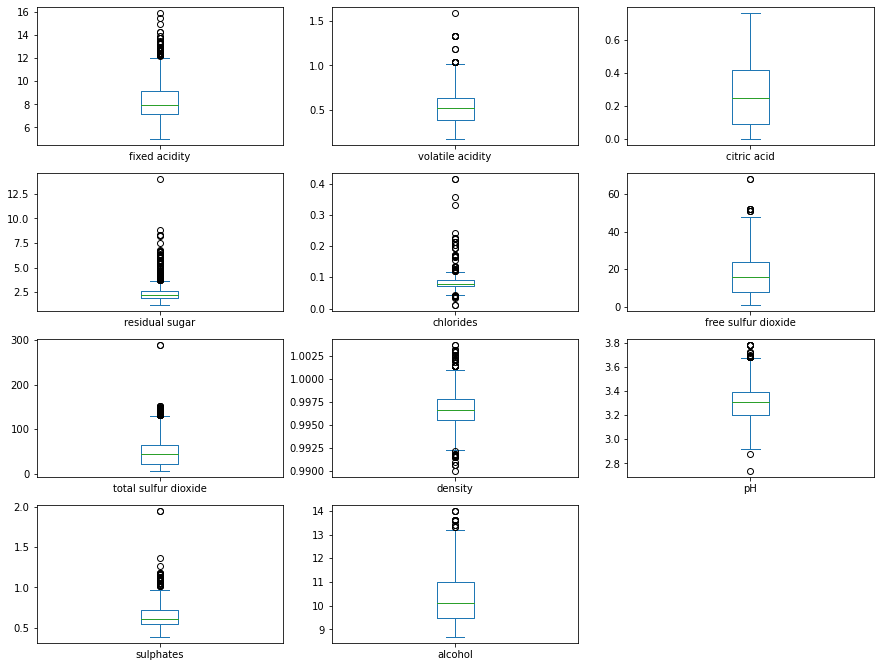

In [11]:
#visualization of outilers, barplot to project outliers.
# plt.figure()
df_train[data].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(10,3),figsize=(15,30))
plt.show()

In [12]:
#defining outliers
def find_outliers_IQR(df_train):

   q1=df_train.quantile(0.25)

   q3=df_train.quantile(0.75)

   IQR=q3-q1

   outliers = df_train[((df_train<(q1-1.5*IQR)) | (df_train>(q3+1.5*IQR)))]

   return outliers

In [13]:
#Checking outliers for one attribute named 'chlorides'
outliers = find_outliers_IQR(df_train['chlorides'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 74
max outlier value: 0.414
min outlier value: 0.012


23      0.041
45      0.041
102     0.039
126     0.039
138     0.205
        ...  
1865    0.034
1887    0.120
1934    0.123
1967    0.213
1983    0.041
Name: chlorides, Length: 74, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

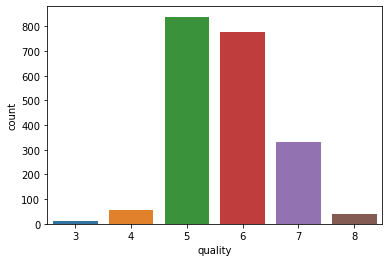

In [14]:
#Checking the balance of out target variable
sns.countplot(x="quality",data=df_train)

In [15]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

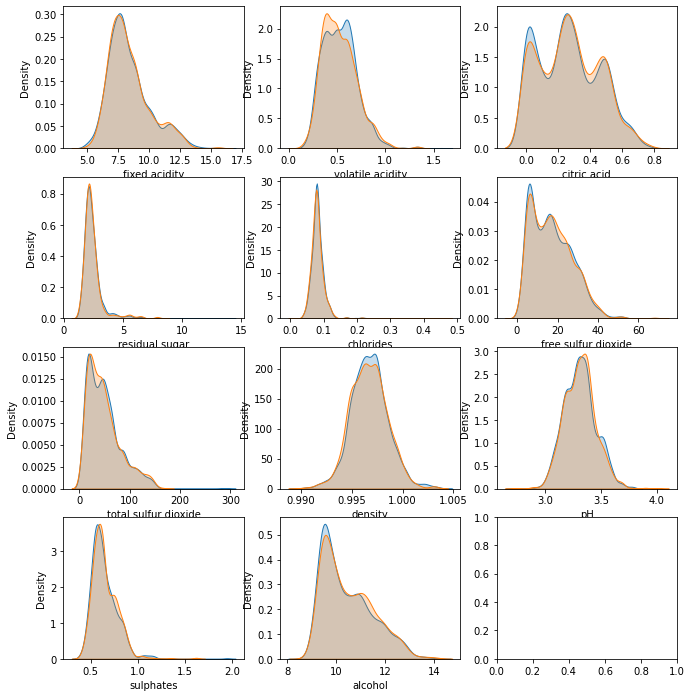

In [16]:
#checking how similar is train and test dataset
#target=df_train["quality"]
fig, ax = plt.subplots(4, 3, figsize = (11, 4*3))
for i, col in enumerate(df_train[data]):
    sns.kdeplot(data=df_train[data], x=col, fill = True, ax = ax[i // 3][i % 3])#,hue=target)
    sns.kdeplot(data=df_test[data], x=col, fill = True, ax = ax[i // 3][i % 3])
    

<AxesSubplot:>

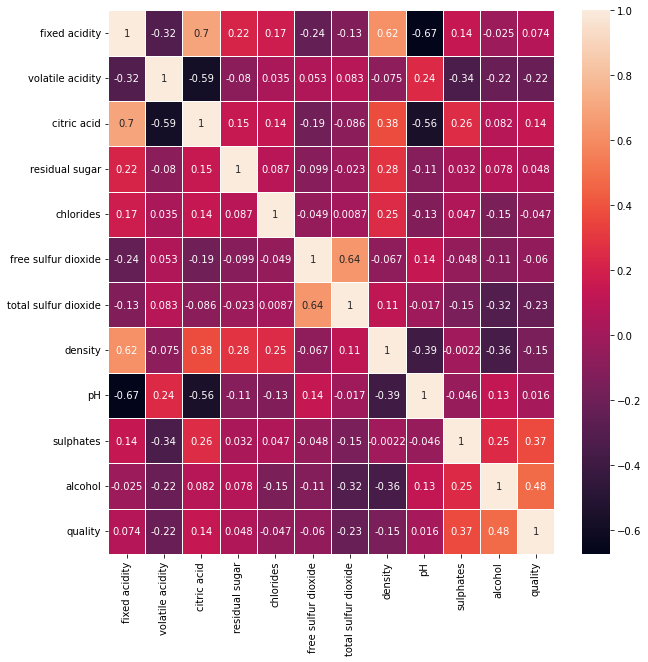

In [17]:
#Checking the correlation between the attributes
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True,fmt=".2g",linewidth=1)

In [18]:
#Defining categorical and numerical columns 
cat_cols = []
target_col = 'quality'
num_cols = df_train.columns.difference(cat_cols+[target_col]).tolist()
df_train[target_col] = df_train[target_col].astype('category')

In [19]:
num_cols,cat_cols

(['alcohol',
  'chlorides',
  'citric acid',
  'density',
  'fixed acidity',
  'free sulfur dioxide',
  'pH',
  'residual sugar',
  'sulphates',
  'total sulfur dioxide',
  'volatile acidity'],
 [])

In [20]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
#Feature engineering for train dataset
df_train['total_acid'] = df_train['fixed acidity'] + df_train['volatile acidity'] + df_train['citric acid']
df_train['acid/density'] = df_train['total_acid']  / df_train['density']
df_train['alcohol_density'] = df_train['alcohol']  * df_train['density']
df_train['sulphate/density'] = df_train['sulphates']  / df_train['density']
df_train['sulphates/acid'] = df_train['sulphates'] / df_train['volatile acidity']
df_train['sulphates/chlorides'] = df_train['sulphates'] / df_train['chlorides']
df_train['sulphates*alcohol'] = df_train['sulphates'] * df_train['alcohol']

In [22]:
#Feature engineering for test dataset
df_test['total_acid'] = df_test['fixed acidity'] + df_test['volatile acidity'] + df_test['citric acid']
df_test['acid/density'] = df_test['total_acid']  / df_test['density']
df_test['alcohol_density'] = df_test['alcohol']  * df_test['density']
df_test['sulphate/density'] = df_test['sulphates']  / df_test['density']
df_test['sulphates/acid'] = df_test['sulphates'] / df_test['volatile acidity']
df_test['sulphates/chlorides'] = df_test['sulphates'] / df_test['chlorides']
df_test['sulphates*alcohol'] = df_test['sulphates'] * df_test['alcohol']

In [23]:
print(df_train.columns)
print((df_train.shape))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'total_acid', 'acid/density',
       'alcohol_density', 'sulphate/density', 'sulphates/acid',
       'sulphates/chlorides', 'sulphates*alcohol'],
      dtype='object')
(2056, 19)


In [24]:
print(df_test.columns)
print((df_test.shape))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'total_acid', 'acid/density',
       'alcohol_density', 'sulphate/density', 'sulphates/acid',
       'sulphates/chlorides', 'sulphates*alcohol'],
      dtype='object')
(1372, 18)


In [25]:
#Dropping the irrelevant and actual features from where the new features were extracted in train dataset
df_train.drop(['fixed acidity','volatile acidity','citric acid'],axis=1,inplace=True)
df_train.drop(['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH','sulphates','alcohol'],axis=1,inplace=True)

In [26]:
#Dropping the irrelevant and actual features from where the new features were extracted in test dataset
df_test.drop(['fixed acidity','volatile acidity','citric acid'],axis=1,inplace=True)
df_test.drop(['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH','sulphates','alcohol'],axis=1,inplace=True)

In [27]:
df_test.columns

Index(['total_acid', 'acid/density', 'alcohol_density', 'sulphate/density',
       'sulphates/acid', 'sulphates/chlorides', 'sulphates*alcohol'],
      dtype='object')

In [28]:
df_train.columns

Index(['quality', 'total_acid', 'acid/density', 'alcohol_density',
       'sulphate/density', 'sulphates/acid', 'sulphates/chlorides',
       'sulphates*alcohol'],
      dtype='object')

In [29]:
print(df_train.shape)
print(df_test.shape)

(2056, 8)
(1372, 7)


In [30]:
df_train['quality']

0       6
1       6
2       7
3       5
4       6
       ..
2051    7
2052    5
2053    8
2054    5
2055    7
Name: quality, Length: 2056, dtype: category
Categories (6, int64): [3, 4, 5, 6, 7, 8]

In [31]:
from sklearn.model_selection import train_test_split
y=df_train['quality']
X=df_train.drop(['quality'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1439, 7)
(617, 7)
(1439,)
(617,)


In [32]:
#Standardization of the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
#reducing the dimensions of the data through pca
from sklearn.decomposition import PCA 
pca=PCA(7)

In [34]:
x_train_pca=pca.fit_transform(X_train)
x_test_pca=pca.fit_transform(X_test)

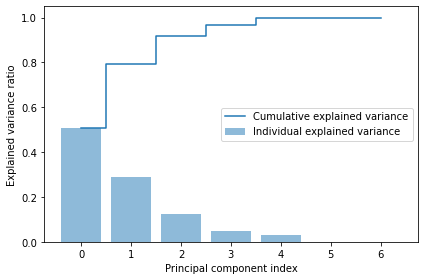

In [35]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
X_train_new = x_train_pca[:,:4]
X_test_new = x_test_pca[:,:4]

In [37]:
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rf=RandomForestClassifier(class_weight='balanced',n_estimators=100,oob_score=True,verbose=0,max_depth=4)
rf.fit(X_train_new, y_train)
y_pred = rf.predict(X_test_new)
y_trains=rf.predict(X_train_new) 

In [39]:
print(cohen_kappa_score(y_train, y_trains)*100)
print(cohen_kappa_score(y_test, y_pred)*100)

31.29187514124634
20.009205126763728


In [40]:
#gridsearch for rf
param_grid={'n_estimators':[400,500,700],'max_depth':[4,5,6,7,8,9,11],'criterion':['entropy']}


In [41]:
from sklearn.metrics import make_scorer
kappa_scorer = make_scorer(cohen_kappa_score,weights='quadratic')
#the parameters in make_scorer is scoring function asked in the question and function quadratic 


In [42]:
#defining the final grid 
grid_rf = GridSearchCV(rf, param_grid, cv=5,verbose=0,scoring=kappa_scorer,n_jobs=-1)


In [43]:
grid_rf.fit(X_train_new,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, oob_score=True),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 11],
                         'n_estimators': [400, 500, 700]},
             scoring=make_scorer(cohen_kappa_score, weights=quadratic))

In [44]:
df_train.columns

Index(['quality', 'total_acid', 'acid/density', 'alcohol_density',
       'sulphate/density', 'sulphates/acid', 'sulphates/chlorides',
       'sulphates*alcohol'],
      dtype='object')

In [45]:
df_test.columns

Index(['total_acid', 'acid/density', 'alcohol_density', 'sulphate/density',
       'sulphates/acid', 'sulphates/chlorides', 'sulphates*alcohol'],
      dtype='object')

In [46]:
grid_rf.best_estimator_,grid_rf.best_score_

(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=7, n_estimators=700, oob_score=True),
 0.5011292114978934)

In [47]:
y_train_pred = grid_rf.best_estimator_.predict(X_train_new)
y_test_pred = grid_rf.best_estimator_.predict(X_test_new)

In [48]:
print(cohen_kappa_score(y_train, y_train_pred)*100)
print(cohen_kappa_score(y_test, y_test_pred)*100)

56.81859646033283
30.011419754265223


In [49]:
#Standardization of the data
X_testdf=scaler.transform(df_test)

In [50]:
df_test.columns

Index(['total_acid', 'acid/density', 'alcohol_density', 'sulphate/density',
       'sulphates/acid', 'sulphates/chlorides', 'sulphates*alcohol'],
      dtype='object')

In [51]:
pca=PCA(7)
x_testdf_pca=pca.fit(df_test)

x_testdf_pca=pca.transform(df_test)
x_testdf_pca=pca.fit_transform(df_test)


In [52]:
X_test_new=x_testdf_pca[:,:4]

In [53]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e5/sample_submission.csv')
submission['quality'] = grid_rf.best_estimator_.predict(X_test_new)
submission.to_csv('submission_grid_rf1.csv', index=False)

In [54]:
#\print(cohen_kappa_score(le.inverse_transform(y_train), le.inverse_transform(y_train_pred))*100)
#print(cohen_kappa_score(le.inverse_transform(y_test), le.inverse_transform(y_test_pred))*100)

In [55]:
#from sklearn.linear_model import LogisticRegression 
#lr=LogisticRegression(class_weight="balanced",max_iter=1000)
#lr.fit(X_train, y_train)
#y_pred = lr.predict(X_test)
#y_trains=lr.predict(X_train)

In [56]:
#print(cohen_kappa_score(y_train, y_trains)*100)
#print(cohen_kappa_score(y_test, y_pred)*100)

In [57]:
#submission = pd.read_csv('/kaggle/input/playground-series-s3e5/sample_submission.csv')


In [58]:
#from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
print(rc)
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)
y_trains=rc.predict(X_train)
print(cohen_kappa_score(y_train, y_trains)*100)
print(cohen_kappa_score(y_test, y_pred)*100)


NameError: name 'RidgeClassifier' is not defined

In [ ]:
#submission['quality'] = grid_rf.best_estimator_.predict(df_test)

In [ ]:
#submission.to_csv('submission_grid_rf1.csv', index=False)